In [12]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets, layers, models


(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [13]:
x_train.shape, train_images.shape

((60000, 28, 28), (60000, 28, 28, 1))

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [15]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(42000, 28, 28, 1) 42000
(18000, 28, 28, 1) 18000


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [19]:
import numpy as np
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [20]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 8,
                    validation_data = (x_val, y_val))

Epoch 1/30
5250/5250 [==============================] - 17s 2ms/step - loss: 0.1372 - acc: 0.9573 - val_loss: 0.0621 - val_acc: 0.9818
Epoch 2/30
5250/5250 [==============================] - 13s 2ms/step - loss: 0.0559 - acc: 0.9832 - val_loss: 0.0492 - val_acc: 0.9855
Epoch 3/30
5250/5250 [==============================] - 13s 2ms/step - loss: 0.0425 - acc: 0.9870 - val_loss: 0.0685 - val_acc: 0.9831
Epoch 4/30
5250/5250 [==============================] - 13s 2ms/step - loss: 0.0368 - acc: 0.9893 - val_loss: 0.0385 - val_acc: 0.9894
Epoch 5/30
5250/5250 [==============================] - 13s 2ms/step - loss: 0.0318 - acc: 0.9909 - val_loss: 0.0433 - val_acc: 0.9888
Epoch 6/30
5250/5250 [==============================] - 13s 2ms/step - loss: 0.0310 - acc: 0.9912 - val_loss: 0.0425 - val_acc: 0.9897
Epoch 7/30
5250/5250 [==============================] - 13s 2ms/step - loss: 0.0298 - acc: 0.9918 - val_loss: 0.0472 - val_acc: 0.9898
Epoch 8/30
5250/5250 [==============================] -

In [24]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by l

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
None


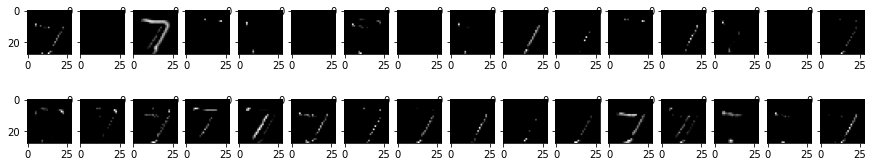

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(32)):
    plt.subplot(2,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________
None


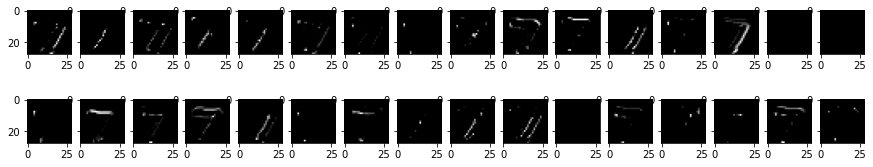

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[1])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(32)):     #여기까지
    plt.subplot(2,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________
None


IndexError: index 32 is out of bounds for axis 2 with size 32

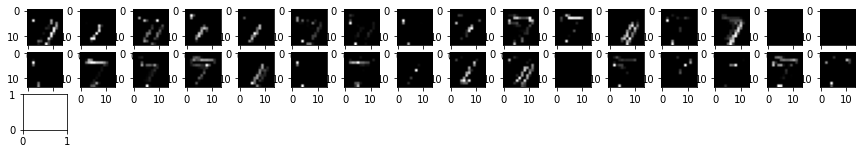

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[2])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(64)):
    plt.subplot(4,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
Total params: 28,064
Trainable params: 28,064
Non-trainable params: 0
_________________________________________________________________
None


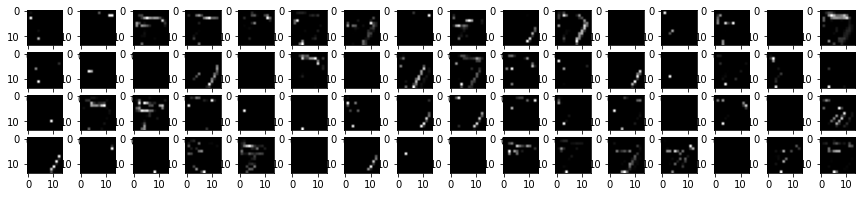

In [28]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[3])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(64)):
    plt.subplot(4,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
Total params: 64,992
Trainable params: 64,992
Non-trainable params: 0
_______________________________________________________

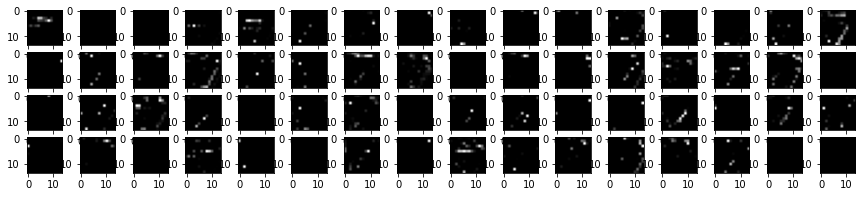

In [29]:
import numpy as np
import matplotlib.pyplot as plt
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[4])
print(visual_model.summary())

test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

plt.figure(figsize=(15,3))
for cnt,x in enumerate(range(64)):
    plt.subplot(4,16,cnt+1)
    plt.imshow(feature_maps[0][:,:,cnt],cmap='gray')

# 당신의 코드를 망치겠습니다.. -괴도M